# Data Science - Mini Project 2 - Alex Montoya Franco
## Students Performance

With this mini project we intend to answer the following questions:

1. Can we predict the final grade of a student based only on its interactions with a learning platform such as moodle?

2. Are "active" students more likely to succeed in a given course?

3. Which interactions are the most relevant? Lessons? Submissions? Forum?

## Step 1 - Data Processing
* Loading Dataset
* Feature Engineering

### Loading Dataset
Upload 'MP2_Data.csv' to Colab to be able to run the code

In [1]:
import pandas as pd

In [2]:
students_df = pd.read_csv('MP2_Data.csv')

In [3]:
students_df.head()

,ID,Week2_Quiz1,Week3_MP1,Week3_PR1,Week5_MP2,Week5_PR2,Week7_MP3,Week7_PR3,Week4_Quiz2,Week6_Quiz3,...,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,Grade
0,ML-2020-1,5.00,15.0,5.0,16.09,5.00,21.88,5.0,5.00,5.0,...,0,5,4,0,4,8,6,1,0,4
1,ML-2020-2,3.33,15.0,5.0,17.83,5.00,22.27,5.0,4.00,5.0,...,8,5,2,0,0,25,3,2,5,4
2,ML-2020-3,1.67,13.0,5.0,15.22,5.00,27.05,2.5,5.00,5.0,...,0,8,2,0,0,9,0,1,0,3
3,ML-2020-4,2.50,14.0,5.0,10.00,5.00,31.02,5.0,3.13,5.0,...,4,10,0,0,0,7,6,0,0,3
4,ML-2020-6,0.00,15.0,5.0,12.17,4.93,15.91,5.0,4.67,5.0,...,6,8,5,1,1,5,3,1,0,2


### Feature Engineering

Choosing the ideal set of features based on:
* Domain Knowledge
* Variance
* Missing Values
* Correlations (redundant features)
* Appropriate ratio features/observations

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Let's see the number of rows and columns
students_df.shape

(107, 48)

For a dataset with 107 rows, having almost half that number of features (48) seems like a dimensionality issue for future models. Having this into account, we will first filter these features to have the most relevant ones for future analysis.

In [6]:
# What are those columns?
students_df.columns

Index(['ID', 'Week2_Quiz1', 'Week3_MP1', 'Week3_PR1', 'Week5_MP2', 'Week5_PR2',
       'Week7_MP3', 'Week7_PR3', 'Week4_Quiz2', 'Week6_Quiz3', 'Week8_Total',
       'Week1_Stat0', 'Week1_Stat1', 'Week1_Stat2', 'Week1_Stat3',
       'Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2', 'Week2_Stat3',
       'Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2', 'Week3_Stat3',
       'Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2', 'Week4_Stat3',
       'Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2', 'Week5_Stat3',
       'Week6_Stat0', 'Week6_Stat1', 'Week6_Stat2', 'Week6_Stat3',
       'Week7_Stat0', 'Week7_Stat1', 'Week7_Stat2', 'Week7_Stat3',
       'Week8_Stat0', 'Week8_Stat1', 'Week8_Stat2', 'Week8_Stat3',
       'Week9_Stat0', 'Week9_Stat1', 'Week9_Stat2', 'Week9_Stat3', 'Grade'],
      dtype='object')

As we can see we have features directly related to the students' grades (Mini Projects, Quizzes, Peer Reviews) and their interactions with the learning platform (course logs - stats)

Category | Columns
--- | ---
Mini Projects | `Week3_MP1` `Week5_MP2` `Week7_MP3`
Quizzes       | `Week2_Quiz1` `Week4_Quiz2` `Week6_Quiz3`
Peer Reviews  | `Week3_PR1` `Week5_PR2` `Week7_PR3`
Week 1 Logs   | `Week1_Stat0` `Week1_Stat1` `Week1_Stat2` `Week1_Stat3`
Week 2 Logs   | `Week2_Stat0` `Week2_Stat1` `Week2_Stat2` `Week2_Stat3`
Week 3 Logs   | `Week3_Stat0` `Week3_Stat1` `Week3_Stat2` `Week3_Stat3`
Week 4 Logs   | `Week4_Stat0` `Week4_Stat1` `Week4_Stat2` `Week4_Stat3`
Week 5 Logs   | `Week5_Stat0` `Week5_Stat1` `Week5_Stat2` `Week5_Stat3`
Week 6 Logs   | `Week6_Stat0` `Week6_Stat1` `Week6_Stat2` `Week6_Stat3`
Week 7 Logs   | `Week7_Stat0` `Week7_Stat1` `Week7_Stat2` `Week7_Stat3`
Week 8 Logs   | `Week8_Stat0` `Week8_Stat1` `Week8_Stat2` `Week8_Stat3`
Week 9 Logs   | `Week9_Stat0` `Week9_Stat1` `Week9_Stat2` `Week9_Stat3`
Final Grade   | `Week8_Total` `Grade`



#### Grades dataframe
Let's first explore the relevance of the grades for our future predictions.

At first glance, we argue that it is not correct to predict a final grade based on all the grades in a course, since this does not need a model prediction but a rather simple mathematical expression. However, we want to explore these features first to understand the data and find possible new details about the grades in the dataset.

This exploration ultimately helped in refining the questions that guide this mini project.

Since there is no description of the scale for the grades and its impact in the final grade (direct or percentage based). We want to understand the min and max values for each grade in the dataset in order to accurately tell if the final grade is at first glance 'only' based on other grades or do students receive any additional points for additional activities (not contained within the dataset) or even for information contained in the course logs.
An initial question in here could be: are more active students rewarded with some type of grade?

In [7]:
miniprojects_df = students_df[['Week3_MP1', 'Week5_MP2', 'Week7_MP3']]
miniprojects_df.head()

,Week3_MP1,Week5_MP2,Week7_MP3
0,15.0,16.09,21.88
1,15.0,17.83,22.27
2,13.0,15.22,27.05
3,14.0,10.00,31.02
4,15.0,12.17,15.91


In [8]:
miniprojects_df.describe()

,Week3_MP1,Week5_MP2,Week7_MP3
count,107.000000,107.000000,107.000000
mean,7.949626,9.237757,14.481869
std,6.892312,8.640610,14.080211
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,12.000000,10.870000,15.910000
75%,14.305000,18.045000,27.440000
max,15.000000,20.000000,35.000000


Assumptions
* Mini Project 1 grade range is [0, 15]
* Mini Project 2 grade range is [0, 20]
* Mini Project 3 grade range is [0, 35]

In [9]:
quizzes_df = students_df[['Week2_Quiz1', 'Week4_Quiz2', 'Week6_Quiz3']]
quizzes_df.head()

,Week2_Quiz1,Week4_Quiz2,Week6_Quiz3
0,5.00,5.00,5.0
1,3.33,4.00,5.0
2,1.67,5.00,5.0
3,2.50,3.13,5.0
4,0.00,4.67,5.0


In [10]:
quizzes_df.describe()

,Week2_Quiz1,Week4_Quiz2,Week6_Quiz3
count,107.000000,107.000000,107.000000
mean,2.406636,2.609439,2.663551
std,2.000317,2.229419,2.414359
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,3.330000,3.170000,4.000000
75%,4.170000,4.710000,5.000000
max,5.000000,5.000000,5.000000


Assumption: All quizzes share the same grade range [0, 5]

In [11]:
peer_reviews_df = students_df[['Week3_PR1', 'Week5_PR2', 'Week7_PR3']]
peer_reviews_df.head()

,Week3_PR1,Week5_PR2,Week7_PR3
0,5.0,5.00,5.0
1,5.0,5.00,5.0
2,5.0,5.00,2.5
3,5.0,5.00,5.0
4,5.0,4.93,5.0


In [12]:
peer_reviews_df.describe()

,Week3_PR1,Week5_PR2,Week7_PR3
count,107.000000,107.000000,107.000000
mean,2.803738,2.844673,2.383178
std,2.493158,2.482099,2.437501
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,5.000000,5.000000,2.500000
75%,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000


Assumption: All peer reviews share the same grade range [0, 5]

In [13]:
final_grade_df = students_df[['Week8_Total', 'Grade']]
final_grade_df.head()

,Week8_Total,Grade
0,82.97,4
1,82.43,4
2,79.44,3
3,80.65,3
4,67.68,2


In [14]:
final_grade_df.describe()

,Week8_Total,Grade
count,107.000000,107.000000
mean,47.380467,2.074766
std,41.035589,1.993863
min,0.000000,0.000000
25%,0.000000,0.000000
50%,71.530000,3.000000
75%,83.550000,4.000000
max,99.710000,5.000000


Assumptions:
* Week8_Total ranges from [0, 99.71] which we will assume as 0 to 100
* Grade range is [0, 1, 2, 3, 4, 5] since it is a categorical value


In [15]:
grades_df = pd.concat([miniprojects_df, quizzes_df, peer_reviews_df, final_grade_df], axis=1, join='inner')
grades_df.head()

,Week3_MP1,Week5_MP2,Week7_MP3,Week2_Quiz1,Week4_Quiz2,Week6_Quiz3,Week3_PR1,Week5_PR2,Week7_PR3,Week8_Total,Grade
0,15.0,16.09,21.88,5.00,5.00,5.0,5.0,5.00,5.0,82.97,4
1,15.0,17.83,22.27,3.33,4.00,5.0,5.0,5.00,5.0,82.43,4
2,13.0,15.22,27.05,1.67,5.00,5.0,5.0,5.00,2.5,79.44,3
3,14.0,10.00,31.02,2.50,3.13,5.0,5.0,5.00,5.0,80.65,3
4,15.0,12.17,15.91,0.00,4.67,5.0,5.0,4.93,5.0,67.68,2


To sum up, if a student gets the max value in every Mini project, Quiz and Peer Review, his/her 'Week8_Total' grade would be 100 and therefore the final 'Grade' will be 5. This show us that grades have a direct correlation to the final grade but are not relevant predictors unless we choose a subset of them. For example, the grades for the first N weeks. 

Let's explore the correlations between the grades to determine whether is worth keeping some of these features or not.

In [16]:
# Creating a correlation matrix
grades_df.corr()

,Week3_MP1,Week5_MP2,Week7_MP3,Week2_Quiz1,Week4_Quiz2,Week6_Quiz3,Week3_PR1,Week5_PR2,Week7_PR3,Week8_Total,Grade
Week3_MP1,1.000000,0.905769,0.881352,0.739992,0.879998,0.912700,0.962502,0.964849,0.834397,0.965074,0.901788
Week5_MP2,0.905769,1.000000,0.904458,0.677371,0.808479,0.847296,0.890706,0.932880,0.874247,0.962302,0.953488
Week7_MP3,0.881352,0.904458,1.000000,0.635804,0.781677,0.814492,0.868638,0.897020,0.807097,0.957955,0.968130
Week2_Quiz1,0.739992,0.677371,0.635804,1.000000,0.746331,0.695119,0.723109,0.710990,0.622655,0.739192,0.689783
Week4_Quiz2,0.879998,0.808479,0.781677,0.746331,1.000000,0.912396,0.904170,0.863713,0.785238,0.884461,0.810920
Week6_Quiz3,0.912700,0.847296,0.814492,0.695119,0.912396,1.000000,0.906560,0.887432,0.814822,0.910623,0.849920
Week3_PR1,0.962502,0.890706,0.868638,0.723109,0.904170,0.906560,1.000000,0.942896,0.830599,0.952095,0.887352
Week5_PR2,0.964849,0.932880,0.897020,0.710990,0.863713,0.887432,0.942896,1.000000,0.854744,0.968613,0.907837
Week7_PR3,0.834397,0.874247,0.807097,0.622655,0.785238,0.814822,0.830599,0.854744,1.000000,0.883680,0.865616
Week8_Total,0.965074,0.962302,0.957955,0.739192,0.884461,0.910623,0.952095,0.968613,0.883680,1.000000,0.972348


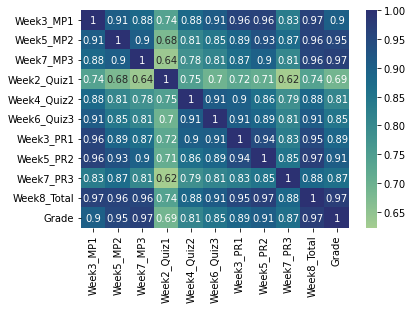

In [17]:
#plot the correlation matrix 
sns.heatmap(grades_df.corr(), annot=True, cmap = 'crest')
plt.show()

This correlation matrix shows that grades are generally highly correlated between each other which means that they are redundant for our analysis. 

We don't consider keeping any of these for further analysis since Quizzes and Peer Reviews are redundant and have a small contribution to the final grade, while mini projects would be the strongest predictors, giving a false impression that our model is successfully predicting students performance.

For now, we will focus on the course logs a.k.a stats to see if they could become interesting predictors for the students' final grade.

#### Logs Dataframes
Let's now explore the course logs a.k.a stats.

Although we have removed 10 columns related to students' grades. We still have 38 columns in our dataset. With this in mind we will proceed with 3 approaches in order to determine which one will give us better results when training our models and which could provide more comprenhensive answers to our research questions.

* Grouping data by week. Is there a specific week where students' chance to pass or fail the course increases?

* Grouping data by stat. Is a student more succesful in the course if it participates more in the forum? if it checks more the lessons?

* Keeping the current features. This might provide more comprehensive answers since it would directly lead us to a specific week and stat. For example, is early participation in forums an initial sign of students success?

We have already removed grade columns based on Domain Knowledge, and we now analyze if we have missing values and low variance in certain columns in order to reduce the feature space more.

In [18]:
week_1_logs_df = students_df[['Week1_Stat0', 'Week1_Stat1', 'Week1_Stat2', 'Week1_Stat3']]
week_2_logs_df = students_df[['Week2_Stat0', 'Week2_Stat1', 'Week2_Stat2', 'Week2_Stat3']]
week_3_logs_df = students_df[['Week3_Stat0', 'Week3_Stat1', 'Week3_Stat2', 'Week3_Stat3']]
week_4_logs_df = students_df[['Week4_Stat0', 'Week4_Stat1', 'Week4_Stat2', 'Week4_Stat3']]
week_5_logs_df = students_df[['Week5_Stat0', 'Week5_Stat1', 'Week5_Stat2', 'Week5_Stat3']]
week_6_logs_df = students_df[['Week6_Stat0', 'Week6_Stat1', 'Week6_Stat2', 'Week6_Stat3']]
week_7_logs_df = students_df[['Week7_Stat0', 'Week7_Stat1', 'Week7_Stat2', 'Week7_Stat3']]
week_8_logs_df = students_df[['Week8_Stat0', 'Week8_Stat1', 'Week8_Stat2', 'Week8_Stat3']]
week_9_logs_df = students_df[['Week9_Stat0', 'Week9_Stat1', 'Week9_Stat2', 'Week9_Stat3']]

In [19]:
# Giving some initial order to the features
course_logs_df = pd.concat([week_1_logs_df, week_2_logs_df, week_3_logs_df, week_4_logs_df,
                            week_5_logs_df, week_6_logs_df, week_7_logs_df, week_8_logs_df,
                            week_9_logs_df], 
                           axis=1, join='inner')
course_logs_df.head()

,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,...,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3
0,0,0,0,0,7,30,1,0,30,4,...,1,0,5,4,0,4,8,6,1,0
1,8,0,0,0,61,10,3,8,100,4,...,0,8,5,2,0,0,25,3,2,5
2,4,0,0,0,19,10,3,3,25,4,...,0,0,8,2,0,0,9,0,1,0
3,12,0,0,1,30,10,1,6,79,4,...,5,4,10,0,0,0,7,6,0,0
4,6,0,0,0,0,0,0,0,27,5,...,3,6,8,5,1,1,5,3,1,0


In [20]:
# Checking missing values
course_logs_df.isnull().sum()

Week1_Stat0    0
Week1_Stat1    0
Week1_Stat2    0
Week1_Stat3    0
Week2_Stat0    0
Week2_Stat1    0
Week2_Stat2    0
Week2_Stat3    0
Week3_Stat0    0
Week3_Stat1    0
Week3_Stat2    0
Week3_Stat3    0
Week4_Stat0    0
Week4_Stat1    0
Week4_Stat2    0
Week4_Stat3    0
Week5_Stat0    0
Week5_Stat1    0
Week5_Stat2    0
Week5_Stat3    0
Week6_Stat0    0
Week6_Stat1    0
Week6_Stat2    0
Week6_Stat3    0
Week7_Stat0    0
Week7_Stat1    0
Week7_Stat2    0
Week7_Stat3    0
Week8_Stat0    0
Week8_Stat1    0
Week8_Stat2    0
Week8_Stat3    0
Week9_Stat0    0
Week9_Stat1    0
Week9_Stat2    0
Week9_Stat3    0
dtype: int64

Apparently we don't have missing values so we can proceed.

In [21]:
from sklearn.feature_selection import VarianceThreshold

In [22]:
# Univariate analysis: removing features with low variance (at least 90% of data points are the same)
variance = VarianceThreshold(threshold = (.9 * (1 - .9))) 
variance.fit(course_logs_df) 
variance.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

The Variance analysis tell us that just the second column 'Week1_Stat1' has a very low variance i.e., at least 90% of the values in this column are the same. For our dataset that means 96 out of 107 are just the same value. The variance analysis was also run for 80% and 70% and 'Week1_Stat1' was still the only column with low variance showing a clear distinction from other columns.

Let's first check the values in this column in order to decide whether or not we drop this feature.

In [23]:
# Checking values in 'Week1_Stat1'
course_logs_df['Week1_Stat1'].value_counts()

0    107
Name: Week1_Stat1, dtype: int64

With this we conclude that there is not only a low variance in this column, but actually is just a column of zeros.

This column won’t help the model to find any patterns so let's remove it.

In [24]:
course_logs_df = course_logs_df.drop(['Week1_Stat1'], axis=1)

In [25]:
course_logs_df.head()

,Week1_Stat0,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,...,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3
0,0,0,0,7,30,1,0,30,4,0,...,1,0,5,4,0,4,8,6,1,0
1,8,0,0,61,10,3,8,100,4,4,...,0,8,5,2,0,0,25,3,2,5
2,4,0,0,19,10,3,3,25,4,0,...,0,0,8,2,0,0,9,0,1,0
3,12,0,1,30,10,1,6,79,4,2,...,5,4,10,0,0,0,7,6,0,0
4,6,0,0,0,0,0,0,27,5,0,...,3,6,8,5,1,1,5,3,1,0


We don't consider more strategies to directly remove current features given that we want to keep certain balance between weeks and stats. Let's then continue with our 3 proposed approaches:
* Group by week
* Group by stat
* Keep all logs features

##### Dataframe grouped by week

In [26]:
course_logs_df['week_1_logs_agg'] = course_logs_df.Week1_Stat0 + course_logs_df.Week1_Stat2 + course_logs_df.Week1_Stat3
course_logs_df['week_2_logs_agg'] = course_logs_df.Week2_Stat0 + course_logs_df.Week2_Stat1 + course_logs_df.Week2_Stat2 + course_logs_df.Week2_Stat3
course_logs_df['week_3_logs_agg'] = course_logs_df.Week3_Stat0 + course_logs_df.Week3_Stat1 + course_logs_df.Week3_Stat2 + course_logs_df.Week3_Stat3
course_logs_df['week_4_logs_agg'] = course_logs_df.Week4_Stat0 + course_logs_df.Week4_Stat1 + course_logs_df.Week4_Stat2 + course_logs_df.Week4_Stat3
course_logs_df['week_5_logs_agg'] = course_logs_df.Week5_Stat0 + course_logs_df.Week5_Stat1 + course_logs_df.Week5_Stat2 + course_logs_df.Week5_Stat3
course_logs_df['week_6_logs_agg'] = course_logs_df.Week6_Stat0 + course_logs_df.Week6_Stat1 + course_logs_df.Week6_Stat2 + course_logs_df.Week6_Stat3
course_logs_df['week_7_logs_agg'] = course_logs_df.Week7_Stat0 + course_logs_df.Week7_Stat1 + course_logs_df.Week7_Stat2 + course_logs_df.Week7_Stat3
course_logs_df['week_8_logs_agg'] = course_logs_df.Week8_Stat0 + course_logs_df.Week8_Stat1 + course_logs_df.Week8_Stat2 + course_logs_df.Week8_Stat3
course_logs_df['week_9_logs_agg'] = course_logs_df.Week9_Stat0 + course_logs_df.Week9_Stat1 + course_logs_df.Week9_Stat2 + course_logs_df.Week9_Stat3
course_logs_df.head()

,Week1_Stat0,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,...,Week9_Stat3,week_1_logs_agg,week_2_logs_agg,week_3_logs_agg,week_4_logs_agg,week_5_logs_agg,week_6_logs_agg,week_7_logs_agg,week_8_logs_agg,week_9_logs_agg
0,0,0,0,7,30,1,0,30,4,0,...,0,0,38,34,55,31,60,3,13,15
1,8,0,0,61,10,3,8,100,4,4,...,5,8,82,111,151,77,85,48,7,35
2,4,0,0,19,10,3,3,25,4,0,...,0,4,35,31,73,36,36,16,10,10
3,12,0,1,30,10,1,6,79,4,2,...,0,13,47,87,270,55,122,42,10,13
4,6,0,0,0,0,0,0,27,5,0,...,0,6,0,32,22,52,43,56,15,9


In [27]:
print(course_logs_df.columns.str.contains('Stat'))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
 False False False False False False False False]


In [28]:
# Remove non-aggregate columns
weeks_agg_df = course_logs_df.drop(course_logs_df.columns[course_logs_df.columns.str.contains('Stat')], axis=1)

In [29]:
weeks_agg_df.head()

,week_1_logs_agg,week_2_logs_agg,week_3_logs_agg,week_4_logs_agg,week_5_logs_agg,week_6_logs_agg,week_7_logs_agg,week_8_logs_agg,week_9_logs_agg
0,0,38,34,55,31,60,3,13,15
1,8,82,111,151,77,85,48,7,35
2,4,35,31,73,36,36,16,10,10
3,13,47,87,270,55,122,42,10,13
4,6,0,32,22,52,43,56,15,9


In [30]:
weeks_agg_df.shape

(107, 9)

We now have 9 columns which allows a more clear analysis of the features available and also simplifies model training in a way that could help produce more accurate results.

##### Dataframe grouped by stat

In [31]:
# Droping non-stat columns from original dataset
stats_agg_df = students_df.drop(students_df.columns[~students_df.columns.str.contains('Stat')], axis=1)
stats_agg_df.head()

,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,...,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3
0,0,0,0,0,7,30,1,0,30,4,...,1,0,5,4,0,4,8,6,1,0
1,8,0,0,0,61,10,3,8,100,4,...,0,8,5,2,0,0,25,3,2,5
2,4,0,0,0,19,10,3,3,25,4,...,0,0,8,2,0,0,9,0,1,0
3,12,0,0,1,30,10,1,6,79,4,...,5,4,10,0,0,0,7,6,0,0
4,6,0,0,0,0,0,0,0,27,5,...,3,6,8,5,1,1,5,3,1,0


In [32]:
stats_agg_df['stat_0_agg'] = stats_agg_df.Week1_Stat0 + stats_agg_df.Week2_Stat0 + stats_agg_df.Week3_Stat0 + stats_agg_df.Week4_Stat0 + stats_agg_df.Week5_Stat0 + stats_agg_df.Week6_Stat0 + stats_agg_df.Week7_Stat0 + stats_agg_df.Week8_Stat0 + stats_agg_df.Week9_Stat0
stats_agg_df['stat_1_agg'] = stats_agg_df.Week1_Stat1 + stats_agg_df.Week2_Stat1 + stats_agg_df.Week3_Stat1 + stats_agg_df.Week4_Stat1 + stats_agg_df.Week5_Stat1 + stats_agg_df.Week6_Stat1 + stats_agg_df.Week7_Stat1 + stats_agg_df.Week8_Stat1 + stats_agg_df.Week9_Stat1 
stats_agg_df['stat_2_agg'] = stats_agg_df.Week1_Stat2 + stats_agg_df.Week2_Stat2 + stats_agg_df.Week3_Stat2 + stats_agg_df.Week4_Stat2 + stats_agg_df.Week5_Stat2 + stats_agg_df.Week6_Stat2 + stats_agg_df.Week7_Stat2 + stats_agg_df.Week8_Stat2 + stats_agg_df.Week9_Stat2 
stats_agg_df['stat_3_agg'] = stats_agg_df.Week1_Stat3 + stats_agg_df.Week2_Stat3 + stats_agg_df.Week3_Stat3 + stats_agg_df.Week4_Stat3 + stats_agg_df.Week5_Stat3 + stats_agg_df.Week6_Stat3 + stats_agg_df.Week7_Stat3 + stats_agg_df.Week8_Stat3 + stats_agg_df.Week9_Stat3 

In [33]:
stats_agg_df.head()

,Week1_Stat0,Week1_Stat1,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,...,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3,stat_0_agg,stat_1_agg,stat_2_agg,stat_3_agg
0,0,0,0,0,7,30,1,0,30,4,...,0,4,8,6,1,0,118,119,8,4
1,8,0,0,0,61,10,3,8,100,4,...,0,0,25,3,2,5,465,85,17,37
2,4,0,0,0,19,10,3,3,25,4,...,0,0,9,0,1,0,169,65,8,9
3,12,0,0,1,30,10,1,6,79,4,...,0,0,7,6,0,0,553,74,17,15
4,6,0,0,0,0,0,0,0,27,5,...,1,1,5,3,1,0,149,62,7,17


In [34]:
# Remove non-aggregate columns
stats_agg_df = stats_agg_df.drop(stats_agg_df.columns[stats_agg_df.columns.str.contains('Week')], axis=1)
stats_agg_df.head()

,stat_0_agg,stat_1_agg,stat_2_agg,stat_3_agg
0,118,119,8,4
1,465,85,17,37
2,169,65,8,9
3,553,74,17,15
4,149,62,7,17


We now have a smaller feature space. This is just another representation of the same data, so even though we don't expect a big impact in the models' results, we think that it might help the models find new interesting trends and perhaps improve accuracy.

In [35]:
stats_agg_df.shape

(107, 4)

##### All logs Dataframe

In [36]:
all_logs_df = course_logs_df.drop(course_logs_df.columns[course_logs_df.columns.str.contains('agg')], axis=1)
all_logs_df.head()

,Week1_Stat0,Week1_Stat2,Week1_Stat3,Week2_Stat0,Week2_Stat1,Week2_Stat2,Week2_Stat3,Week3_Stat0,Week3_Stat1,Week3_Stat2,...,Week7_Stat2,Week7_Stat3,Week8_Stat0,Week8_Stat1,Week8_Stat2,Week8_Stat3,Week9_Stat0,Week9_Stat1,Week9_Stat2,Week9_Stat3
0,0,0,0,7,30,1,0,30,4,0,...,1,0,5,4,0,4,8,6,1,0
1,8,0,0,61,10,3,8,100,4,4,...,0,8,5,2,0,0,25,3,2,5
2,4,0,0,19,10,3,3,25,4,0,...,0,0,8,2,0,0,9,0,1,0
3,12,0,1,30,10,1,6,79,4,2,...,5,4,10,0,0,0,7,6,0,0
4,6,0,0,0,0,0,0,27,5,0,...,3,6,8,5,1,1,5,3,1,0


## Step 2 – Training & Test Dataset
Given the size of the dataset, we consider that we need the most data points possible to train the models. Therefore, we choose a split of 80/20 (80% training - 20% testing).


We also tried a different split of the data in Step 3 - Models Training (70/30) in order to see if there would be any effect on the predictions. The was not a noticeable effect, so the 80/20 ratio is kept.

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
# Split for dataframe grouped by week
X_train_weeks, X_test_weeks, y_train_weeks, y_test_weeks = train_test_split(weeks_agg_df, students_df.Grade, test_size=0.20, shuffle=True, random_state=42)

In [39]:
# Split for dataframe grouped by stat
X_train_stats, X_test_stats, y_train_stats, y_test_stats = train_test_split(stats_agg_df, students_df.Grade, test_size=0.20, shuffle=True, random_state=42)

In [40]:
# Split for all logs dataframe
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(all_logs_df, students_df.Grade, test_size=0.20, shuffle=True, random_state=42)

## Step 3 – Models Training
Predicting the students’ final grade using:
* Random Forest Classifier
* KNN Classifier

###  3.1 - Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [52]:
# Random Forest with 100 trees
clf_weeks_1 = RandomForestClassifier(n_estimators=100)

In [53]:
# Training the model in our first set of data (grouped by week)
clf_weeks_1.fit(X_train_weeks,y_train_weeks)

RandomForestClassifier()

In [54]:
# Use the model to predict the test data
y_pred_weeks_1 = clf_weeks_1.predict(X_test_weeks)

In [55]:
# Model Accuracy (how often is the classifier correct?)
# How accurate does the model predict the students’ final grade?
print("Accuracy:", metrics.accuracy_score(y_test_weeks, y_pred_weeks_1))

Accuracy: 0.6818181818181818


In case it changes, these values have been shown multiple times as the accuracy for the model. Since a random forest classifier might have a different accuracy when training it again, we use these as reference.

* Accuracy: 0.5454545454545454
* Accuracy: 0.6363636363636364
* Accuracy: 0.5909090909090909
* Accuracy: 0.6818181818181818


This result tell us that our model is not very good at classifying new data. Let's tune the model to try and get better results.

In [56]:
# Increasing the number of estimators/trees to try to get better accuracy
clf_weeks_2 = RandomForestClassifier(n_estimators=150)

In [57]:
clf_weeks_2.fit(X_train_weeks,y_train_weeks)

RandomForestClassifier(n_estimators=150)

In [58]:
y_pred_weeks_2 = clf_weeks_2.predict(X_test_weeks)

In [59]:
print("Accuracy:", metrics.accuracy_score(y_test_weeks, y_pred_weeks_2))

Accuracy: 0.5454545454545454


More estimators do not improve accuracy in this case. In some cases keeps the same, in other it even gets a worse result.

Values shown:

* Accuracy: 0.5454545454545454
* Accuracy: 0.6363636363636364

Since there is not an improvement by increasing the number of estimators. Let's try to decrease them and see what happens.

In [61]:
clf_weeks_3 = RandomForestClassifier(n_estimators=50)
clf_weeks_3.fit(X_train_weeks,y_train_weeks)
y_pred_weeks_3 = clf_weeks_3.predict(X_test_weeks)
print("Accuracy:", metrics.accuracy_score(y_test_weeks, y_pred_weeks_3))

Accuracy: 0.6363636363636364


After training multiple times (with 50, 100, 200, 300 estimators). We conclude that the model is not getting any better than 63% (sometimes 68%) at predicting new values.

Let's train the models with the other two approaches discussed during our feature engineering process to see if we get better results.

Let's now try with the Dataframe grouped by stat

In [64]:
clf_stats_1 = RandomForestClassifier(n_estimators=100)
clf_stats_1.fit(X_train_stats,y_train_stats)
y_pred_stats_1 = clf_stats_1.predict(X_test_stats)
print("Accuracy:", metrics.accuracy_score(y_test_stats, y_pred_stats_1))

Accuracy: 0.5909090909090909


Other representation of our data did not help the model. 
Accuracy is still in the 0.54 - 0.63 range.

Let's now try with the All logs dataframe.

In [74]:
clf_all_1 = RandomForestClassifier(n_estimators=100)
clf_all_1.fit(X_train_all,y_train_all)
y_pred_all_1 = clf_all_1.predict(X_test_all)
print("Accuracy:", metrics.accuracy_score(y_test_all, y_pred_all_1))

Accuracy: 0.6818181818181818


The model does not get better than 68% accuracy with all the course logs. Staying most of the trainings between 54% and 63%. Since this is one of the best classifiers methods out there we start getting an idea of what can be answered with the data available and the chosen features.

### 3.2 - KNN

Let's now try KNN for its simplicity and see how it compares to our random forest classifier

In [75]:
# See the distinct classes in order to define the neighbours for KNN
students_df.Grade.unique()

array([4, 3, 2, 0, 5])

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
knn_weeks_model = KNeighborsClassifier(n_neighbors=5)

In [78]:
knn_weeks_model.fit(X_train_weeks, y_train_weeks)

KNeighborsClassifier()

In [79]:
y_pred_knn_weeks = knn_weeks_model.predict(X_test_weeks)

In [81]:
print("Accuracy:",metrics.accuracy_score(y_test_weeks, y_pred_knn_weeks))

Accuracy: 0.5454545454545454


Let's now train with the data grouped by stats

In [82]:
knn_stats_model = KNeighborsClassifier(n_neighbors=5)
knn_stats_model.fit(X_train_stats, y_train_stats)
y_pred_knn_stats = knn_stats_model.predict(X_test_stats)
print("Accuracy:",metrics.accuracy_score(y_test_stats, y_pred_knn_stats))

Accuracy: 0.5454545454545454


Let's now try with the all logs dataset

In [83]:
knn_all_model = KNeighborsClassifier(n_neighbors=5)
knn_all_model.fit(X_train_all, y_train_all)
y_pred_knn_all = knn_all_model.predict(X_test_all)
print("Accuracy:",metrics.accuracy_score(y_test_all, y_pred_knn_all))

Accuracy: 0.5


There is not an improvement in the accuracy when using KNN. It actually got a smaller worse result for our last dataframe which shows a small advantage by the random forest classifier, showing that having a ensemble method can clearly improve our model performance. However, this also shows that no matter how good your model is, your data is the key. We can now conclude that the available data and chosen features do not describe well our target.

Neither of the models predict the students' final grade with high confidence. With that in mind Random Forest Classifier is the clear winner out of this. Given its way of working, it produces slighly different results when repeating the training process with the same data, ranging between 54%-68% accuracy. On the other hand, KNN never got a better accuracy than 54% and it actually decreased for one of the scenarios until simply 50% (missing the right answer half the time!).

The most direct comparison which we can make right now is how they both work. KNN is a simple type of model which uses the distances between data points to form groups and classify data, while Random Forest uses an esemble of decision trees which can produce more accurate results by protecting trees from the errors of other estimators.


## Step 4 – Performance Evaluation
* Accuracy, Confusion Matrix, Precision, Recall, F1-score
* Model Tuning Ideas


Models Performance has been partially cover in the previous section "Step 3 - Models Training". We summarize those results in here, add new performance metrics, and also discuss what could be possible changes to improve our models. Finally, we show some visualizations in order to give a better picture of our models performance.

Random Forest Classifiers Accuracy

In [84]:
# Random Forest Classifier [100 estimators] [dataframe grouped by week]
print("Accuracy:", metrics.accuracy_score(y_test_weeks, y_pred_weeks_1))

# Random Forest Classifier [150 estimators] [dataframe grouped by week]
print("Accuracy:", metrics.accuracy_score(y_test_weeks, y_pred_weeks_2))

# Random Forest Classifier [50 estimators] [dataframe grouped by week]
print("Accuracy:", metrics.accuracy_score(y_test_weeks, y_pred_weeks_3))

# Random Forest Classifier [100 estimators] [dataframe grouped by stat]
print("Accuracy:", metrics.accuracy_score(y_test_stats, y_pred_stats_1))

# Random Forest Classifier [100 estimators] [all logs dataframe]
print("Accuracy:", metrics.accuracy_score(y_test_all, y_pred_all_1))

Accuracy: 0.6818181818181818
Accuracy: 0.5454545454545454
Accuracy: 0.6363636363636364
Accuracy: 0.5909090909090909
Accuracy: 0.6818181818181818


KNN Accuracy

In [85]:
# KNN [k = 5] [dataframe grouped by week]
print("Accuracy:",metrics.accuracy_score(y_test_weeks, y_pred_knn_weeks))

# KNN [k = 5] [dataframe grouped by stat]
print("Accuracy:",metrics.accuracy_score(y_test_stats, y_pred_knn_stats))

# KNN [k = 5] [all logs dataframe]
print("Accuracy:",metrics.accuracy_score(y_test_all, y_pred_knn_all))

Accuracy: 0.5454545454545454
Accuracy: 0.5454545454545454
Accuracy: 0.5


Although the accuracy gives us a first hint at how our models are doing, the accuracy is not a great measure of classifier performance when the classes are imbalanced. We need more information to understand how well the model really performed for each class. 
Let’s find out with a confusion matrix. A confusion matrix is a way to express how many of a classifier’s predictions were correct, and when incorrect, where the classifier got confused. https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [87]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test_stats, y_pred_stats_1)

array([[10,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  0],
       [ 0,  1,  2,  2,  1],
       [ 1,  0,  2,  0,  0]])

In [88]:
import numpy as np

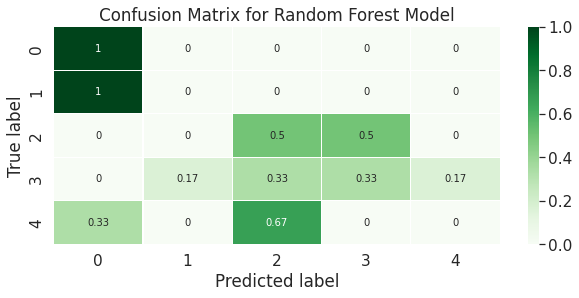

In [89]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_stats, y_pred_stats_1)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(10,4))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['0', '2', '3', '4', '5']

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

Now it’s easier to see that our classifier struggled at predicting multiple labels. For example, Class "2", which was mislabed half the time as class "3".

In [90]:
# View the classification report for test data and predictions
print(classification_report(y_test_stats, y_pred_stats_1))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           2       0.00      0.00      0.00         1
           3       0.20      0.50      0.29         2
           4       0.67      0.33      0.44         6
           5       0.00      0.00      0.00         3

    accuracy                           0.59        22
   macro avg       0.34      0.37      0.33        22
weighted avg       0.58      0.59      0.56        22



Possible improvements for our data and models:
* Add new features which provide a more clear representation of students interactions with the plaform.
* Combine the final grades into two classes (pass or fail) to create a binary classifier.
* For the KNN model, test different distance measures. These distances are used to calculate the similarity between data points. A good distance metric boosts the performance of a model.



## Step 5 – Important features
Most important features in predicting students’ final grade

Since we have concluded that our models do not accurately predict students' performance, we consider the following features are not the most important for a correct prediction, but instead the most relevant for our current model. What our models consider better to predict a grade, which might clearly be innacurate given our results.

### Important Features for Dataframe grouped by week

https://vitalflux.com/feature-importance-random-forest-classifier-python/

In [91]:
importances = clf_weeks_1.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

weeks_df = pd.concat([weeks_agg_df, students_df.Grade], axis=1, join='inner')

feat_labels = weeks_df.columns[1:]
 
for f in range(X_train_weeks.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) week_6_logs_agg                0.195385
 2) week_7_logs_agg                0.147462
 3) Grade                          0.142527
 4) week_8_logs_agg                0.115338
 5) week_9_logs_agg                0.097070
 6) week_4_logs_agg                0.091700
 7) week_5_logs_agg                0.084354
 8) week_2_logs_agg                0.071750
 9) week_3_logs_agg                0.054414


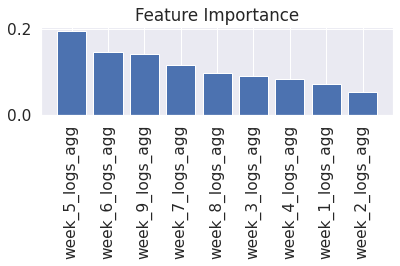

In [92]:
plt.title('Feature Importance')
plt.bar(range(X_train_weeks.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train_weeks.shape[1]), X_train_weeks.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

The three most relevant features are the logs aggregates for week 5, week 6 and week 9, which might be an indication on how interactions with the plaform increases towards the middle and end of the course.

### Important Features for Dataframe grouped by stat

https://vitalflux.com/feature-importance-random-forest-classifier-python/

In [93]:
importances = clf_stats_1.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

stats_df = pd.concat([stats_agg_df, students_df.Grade], axis=1, join='inner')

feat_labels = stats_df.columns[1:]
 
for f in range(X_train_stats.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) stat_2_agg                     0.348538
 2) stat_1_agg                     0.342166
 3) Grade                          0.165164
 4) stat_3_agg                     0.144131


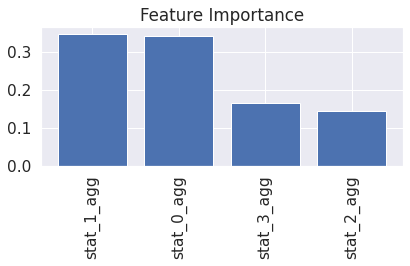

In [94]:
plt.title('Feature Importance')
plt.bar(range(X_train_stats.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train_stats.shape[1]), X_train_stats.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

Stat 1 and Stat 0 are the most important features for this representation of our data. 

Stat 1 is related to assignments, including quizzes attempts, and project submissions, this might be an indicator that the more a student engage with graded activities, better results it might get.

Stat 0 corresponds to the lessons and content, which might indicate us that the more a student prepares with the resources available in the platform, the highest the change to succeed in the course.

We can interpret from this, while answering our third project question, that the most relevant interactions that students have with the plaform are submitting assignments and reviewing learning content. In third place, we have Stat 3, which is forum related and it could hint at the value of checking the forum to receive help or offer help during the course.

The "All logs dataframe" did not provide relevant information in terms of feature importance. Given the amount of features the importance was dispersed among the features and did not show a clear trend. Therefore, is not further explored in here.

However, we do recognize that going back to our feature engineering process with a subset of these features might give a new chance to our models to improve their accuracy. We consider this for future work.